#### Предсказываем цену автомобиля

В папке лежит датасет Car details v3, в котором содержатся сведения об автомобилях, их характеристики и цены. Обучите модель линейной регрессии, которая будет предсказывать цену автомобиля по его характеристикам. 

Придется хорошенько поработать с характеристиками: это *творческая* часть задания. Во-первых, надо привести их в машиночитаемый вид, а во-вторых, можно посмотреть, как они коррелируют друг с другом и не нужно ли кого-то из них дропнуть или наоборот. 

*Примечание*: без работы над фичами за все дз - **0 баллов**. 

In [76]:
import pandas as pd

In [77]:
data = pd.read_csv('Car details v3.csv')
data.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


Название автомобиля слишком трудно привести к числовому виду: если использовать OHE, то датасет слишком сильно раздуется. Поэтому его нужно убрать.

kmpl — километры на литр, km/kg — километры на килограмм. Так как масса топлива зависит от его объёма не напрямую, эту колонку придётся убрать из-за невозможности привести данные к единой размерности.

Значения в колонке torque вообще непонятно, как интерпретировать. Таким образом, от неё тоже следует избавиться.

In [78]:
data = data.drop(columns=['name', 'mileage', 'torque'])

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   engine         7907 non-null   object 
 8   max_power      7913 non-null   object 
 9   seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 635.1+ KB


Немного почистим данные: приведём числовые к числу, а категориальные — закодируем числами.

In [80]:
data['transmission'] = pd.to_numeric(data['transmission'].apply(lambda x: 1 if x == 'Manual' else 0))
data['seller_type'] = pd.to_numeric(data['seller_type'].apply(lambda x: 1 if x == 'Individual' else 0))
data['owner'] = pd.to_numeric(data['owner'].apply(lambda x: 1 if x == 'First Owner' else 2 if x == 'Second Owner' else 3 if x == 'Third Owner' else 4))
data = pd.get_dummies(data, columns=['fuel'], drop_first=True)
data['max_power'].replace({' bhp':''}, regex=True, inplace=True)
data['max_power'] = pd.to_numeric(data['max_power'])
data['engine'].replace({' CC':''}, regex=True, inplace=True)
data['engine'] = pd.to_numeric(data['engine'])
data.dropna(inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   seller_type    7906 non-null   int64  
 4   transmission   7906 non-null   int64  
 5   owner          7906 non-null   int64  
 6   engine         7906 non-null   float64
 7   max_power      7906 non-null   float64
 8   seats          7906 non-null   float64
 9   fuel_Diesel    7906 non-null   uint8  
 10  fuel_LPG       7906 non-null   uint8  
 11  fuel_Petrol    7906 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 640.8 KB


Можно обучать!

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [82]:
Y = data['selling_price']
X = data.drop(columns='selling_price')
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)

In [83]:
model = LinearRegression()
model.fit(Xtrain, Ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)
print(sqrt(mse(pred_train, Ytrain)), sqrt(mse(pred_test, Ytest)))

453355.83632386976 506932.43817298335


Модель не переобучена! Попробуем поотбрасывать наименее коррелирующие с ценой признаки.

<Axes: >

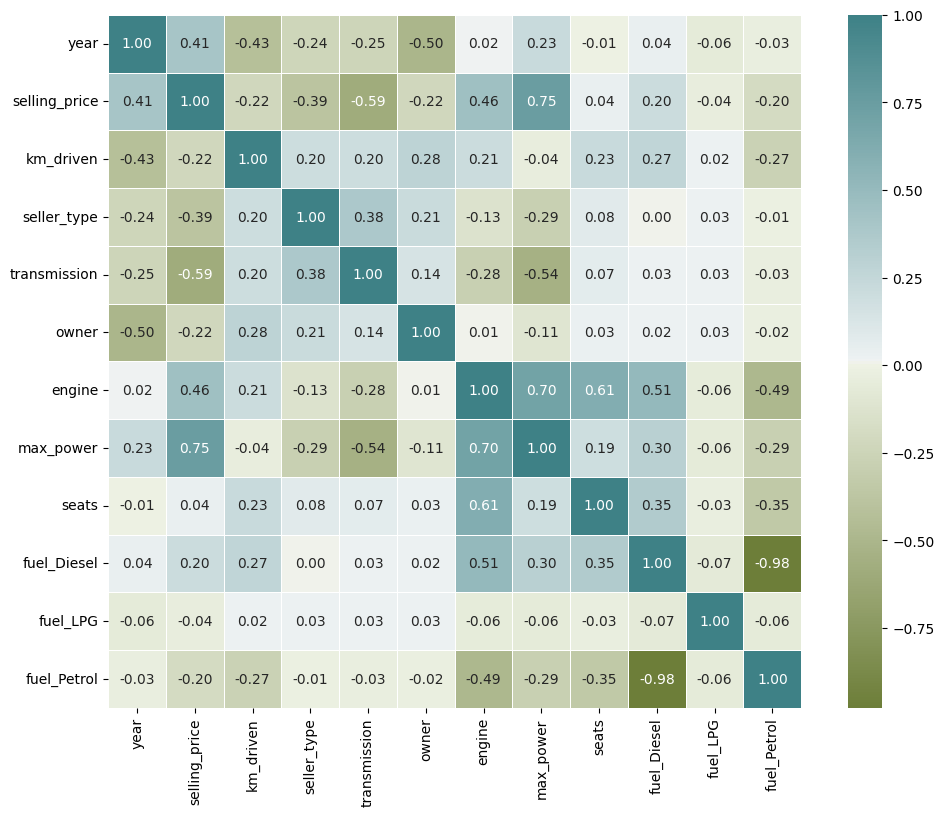

In [87]:
from matplotlib import pylab as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',
            mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [85]:
X = X.drop(columns='seats')
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)
model.fit(Xtrain, Ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)
print(sqrt(mse(pred_train, Ytrain)), sqrt(mse(pred_test, Ytest)))

460124.79016519943 486438.2790726944


Стало лучше! Выкинем ещё один признак.

In [86]:
X = X.drop(columns='fuel_LPG')
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)
model.fit(Xtrain, Ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)
print(sqrt(mse(pred_train, Ytrain)), sqrt(mse(pred_test, Ytest)))

462760.2867329377 476197.50602013554


И ещё один, прикола ради.

In [96]:
X = X.drop(columns='fuel_Diesel')
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)
model.fit(Xtrain, Ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)
print(sqrt(mse(pred_train, Ytrain)), sqrt(mse(pred_test, Ytest)))

467202.2114593806 458538.6693919614


Всё лучше и лучше!

In [98]:
X = X.drop(columns='fuel_Petrol')
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)
model.fit(Xtrain, Ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)
print(sqrt(mse(pred_train, Ytrain)), sqrt(mse(pred_test, Ytest)))

468667.9986966782 466123.080140277


Обе ошибки начали расти, остановимся на этом.